In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [74]:
rcParams['figure.figsize']=7,6

In [75]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
df = df_iris.loc[:,'sepal_length':'petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
cols = ['sepal_length','sepal_width','petal_length','petal_width']

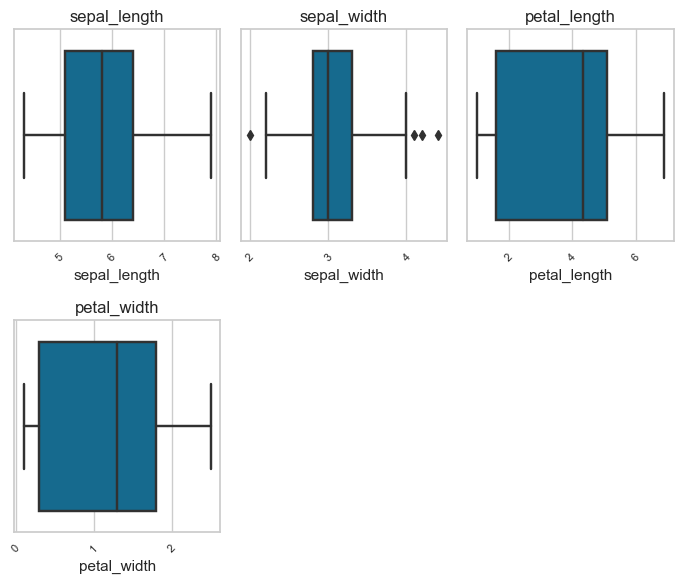

In [78]:
j = 1
for i in cols:
    plt.subplot(2,3,j)
    sns.boxplot(x=df_iris.loc[:,i])
    plt.title(i)
    j = j+1
    
    plt.xticks(rotation=45,fontsize=8)
    
plt.tight_layout()
plt.show()

In [79]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

lower = q1-(1.5)*iqr
upper = q3+(1.5)*iqr

In [80]:
df = df[~((df<lower) | (df>upper)).any(axis=1)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [81]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.123144,0.879362,0.822587
sepal_width,-0.123144,1.000000,-0.406141,-0.340602
petal_length,0.879362,-0.406141,1.000000,0.961866
petal_width,0.822587,-0.340602,0.961866,1.000000


In [82]:
# Scaling

df_scaled = df.apply(zscore)
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525


In [83]:
# cluster
cluster_range = range(1,15)
wcss = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=15,random_state=2)
    clusters.fit(df_scaled)
    
    wcss.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'Inertia':wcss})
clusters_df[0:15]

,num_clusters,Inertia
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.680572
4,5,88.896515
5,6,78.672547
6,7,68.034136
7,8,59.598271
8,9,52.691659
9,10,47.270848


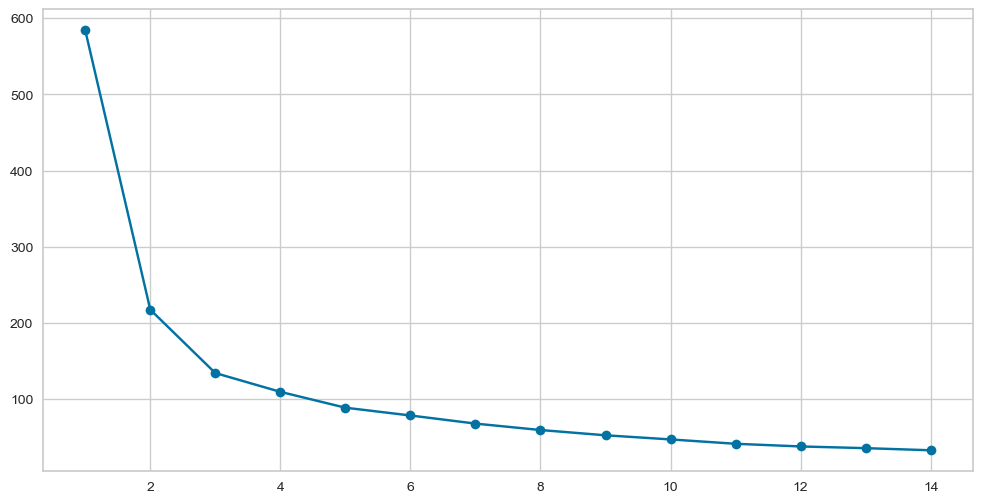

In [84]:
# elbow plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.Inertia, marker='o')

In [85]:
kmeans = KMeans(n_clusters=3,n_init=15,random_state=2)

In [86]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [87]:
# join the labels with the original data

df['cluster'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
# count of each cluster

df.cluster.value_counts()

cluster
1    56
0    47
2    43
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

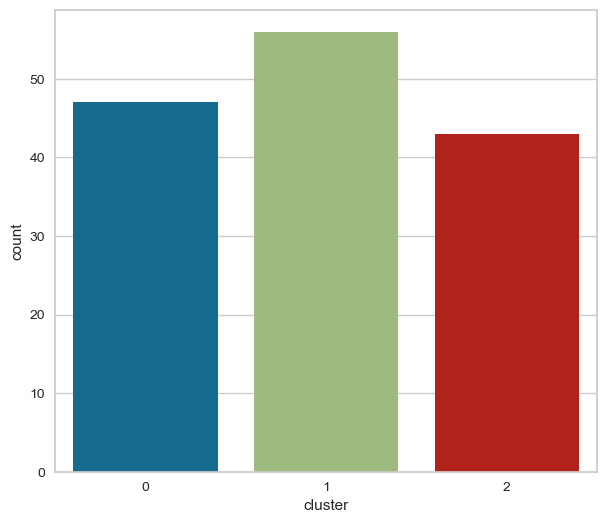

In [89]:
sns.countplot(df,x='cluster')

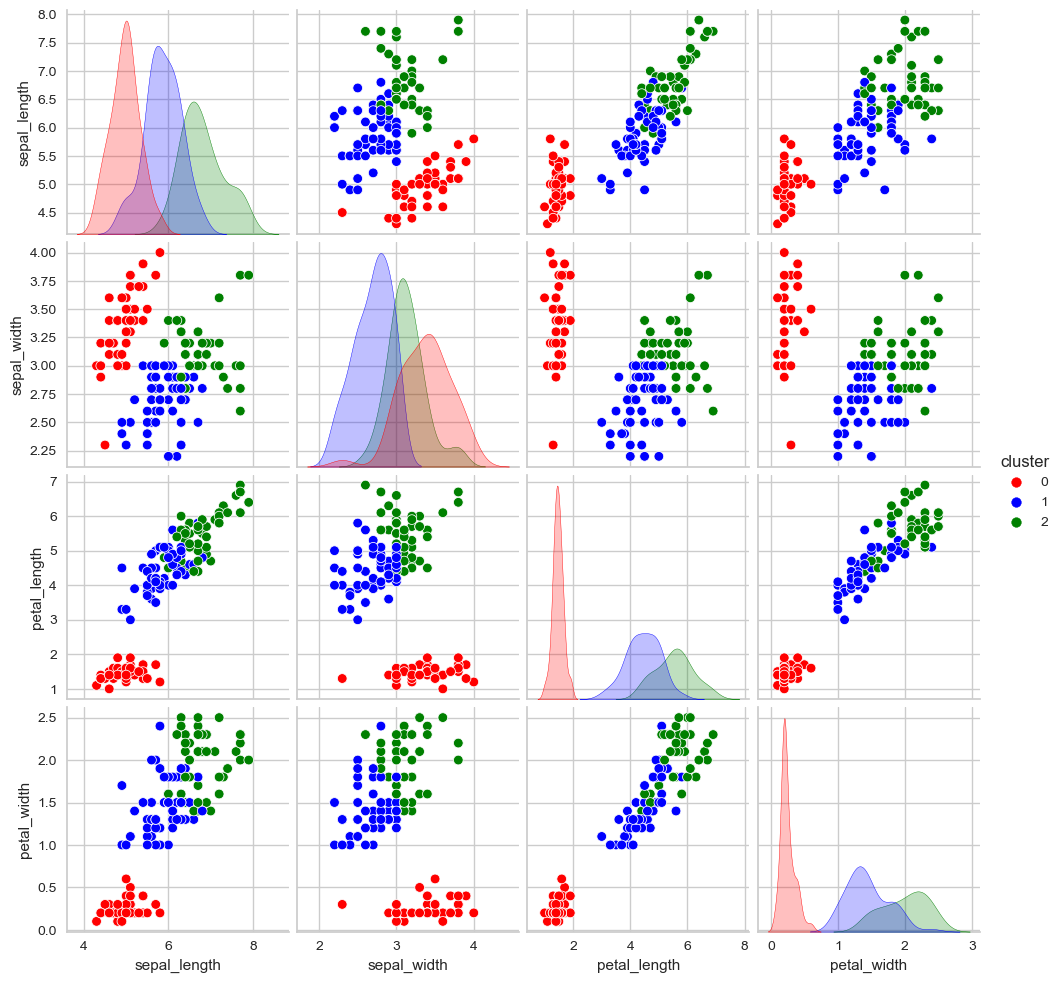

In [90]:
# visualization of clusters formed

sns.pairplot(df,diag_kind='kde',hue='cluster',palette=['red','blue','green'])

In [91]:
# cluster profiling

# first cluster

df[df.cluster==0].describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,4.976596,3.376596,1.461702,0.246809,0.0
std,0.338932,0.327183,0.178829,0.103946,0.0
min,4.300000,2.300000,1.000000,0.100000,0.0
25%,4.800000,3.150000,1.400000,0.200000,0.0
50%,5.000000,3.400000,1.500000,0.200000,0.0
75%,5.100000,3.600000,1.600000,0.300000,0.0
max,5.800000,4.000000,1.900000,0.600000,0.0


In [92]:
# second cluster

df[df.cluster==1].describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,56.000000,56.000000,56.000000,56.000000,56.0
mean,5.866071,2.691071,4.444643,1.442857,1.0
std,0.424811,0.235315,0.582134,0.312094,0.0
min,4.900000,2.200000,3.000000,1.000000,1.0
25%,5.600000,2.500000,4.000000,1.275000,1.0
50%,5.800000,2.700000,4.500000,1.400000,1.0
75%,6.125000,2.900000,4.900000,1.625000,1.0
max,6.800000,3.000000,5.800000,2.400000,1.0


In [93]:
# third cluster

df[df.cluster==2].describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,43.000000,43.000000,43.000000,43.000000,43.0
mean,6.806977,3.127907,5.539535,1.995349,2.0
std,0.498281,0.244293,0.648860,0.331629,0.0
min,5.900000,2.600000,4.400000,1.400000,2.0
25%,6.400000,3.000000,5.100000,1.800000,2.0
50%,6.700000,3.100000,5.600000,2.100000,2.0
75%,7.150000,3.200000,5.950000,2.300000,2.0
max,7.900000,3.800000,6.900000,2.500000,2.0


In [94]:
df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,4.976596,3.376596,1.461702,0.246809
1,5.866071,2.691071,4.444643,1.442857
2,6.806977,3.127907,5.539535,1.995349


In [95]:
# we can't do feature selection using KNN



In [96]:
# Business Insights
# Cluster number 0 is unique comapred to other groups as the 

In [97]:
# Silhouette Score and coefficient

from sklearn.metrics import silhouette_score

In [98]:
# finding the optimal value of K
n_clusters = [2,3,4,5,6,7,8,9,10]
sil_score=[]

for k in n_clusters:
    kmns = KMeans(n_clusters = k, random_state=10, n_init=10)
    
    kmns.fit(df_scaled)
    label = kmns.labels_
    score = silhouette_score(df_scaled,label,random_state=10)
    
    sil_score.append(score)
    
    print("The Silhouette score for {} cluster is {}".format(k,score))

The Silhouette score for 2 cluster is 0.5820112380678973
The Silhouette score for 3 cluster is 0.46704048699050305
The Silhouette score for 4 cluster is 0.4155620853214179
The Silhouette score for 5 cluster is 0.35777201814278564
The Silhouette score for 6 cluster is 0.34478392733260094
The Silhouette score for 7 cluster is 0.3626335741981215
The Silhouette score for 8 cluster is 0.35022371284921294
The Silhouette score for 9 cluster is 0.3602418820149322
The Silhouette score for 10 cluster is 0.3553947075532042


<BarContainer object of 9 artists>

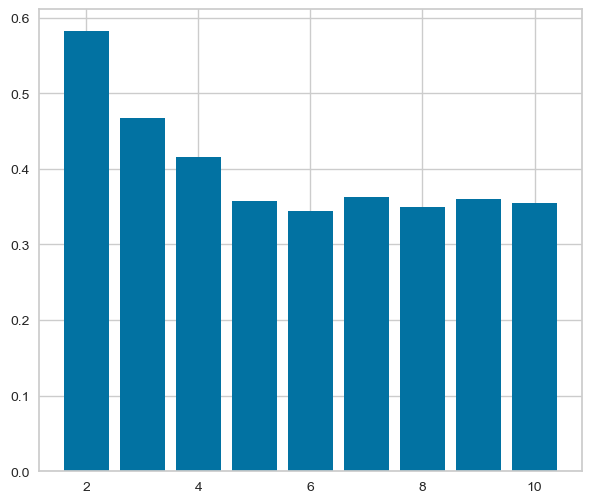

In [99]:
plt.bar(range(2,11),sil_score)

In [100]:
# Larger the width poorer is the cluster

In [101]:
! pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [102]:
from yellowbrick.cluster import SilhouetteVisualizer

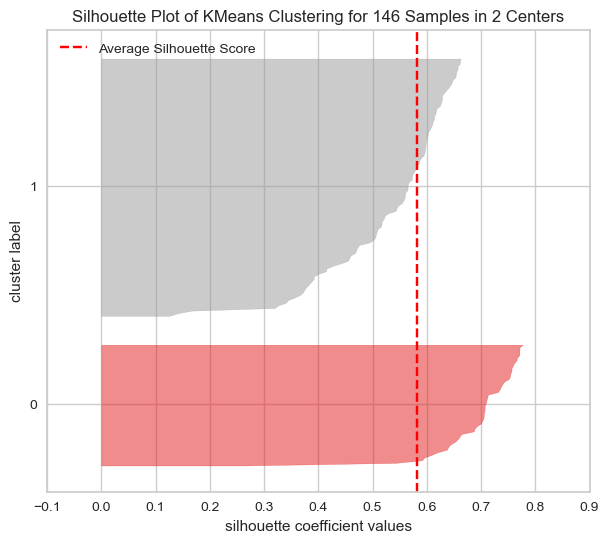

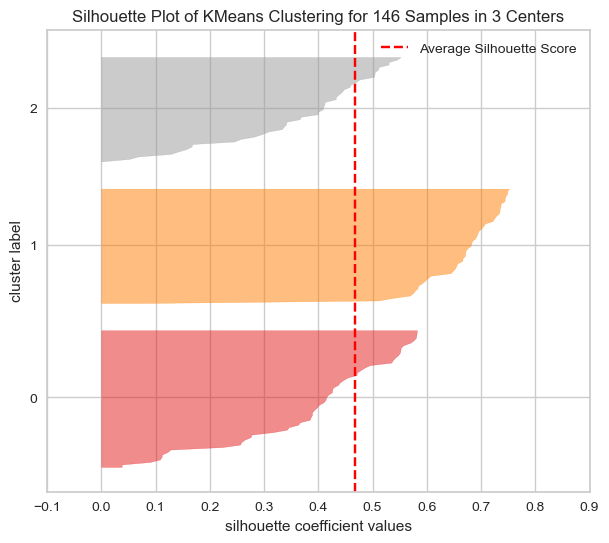

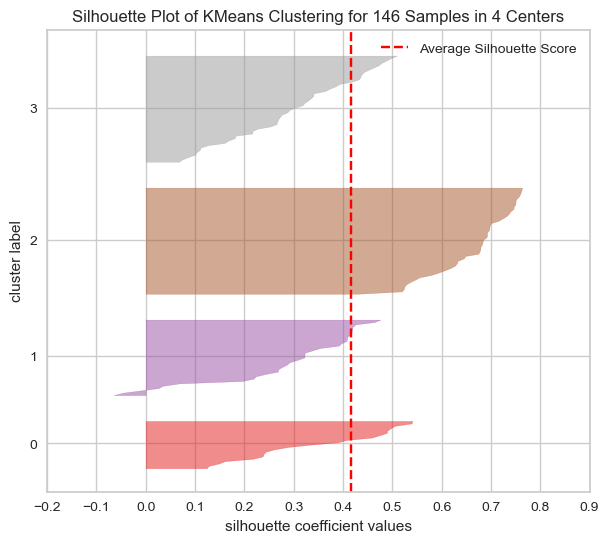

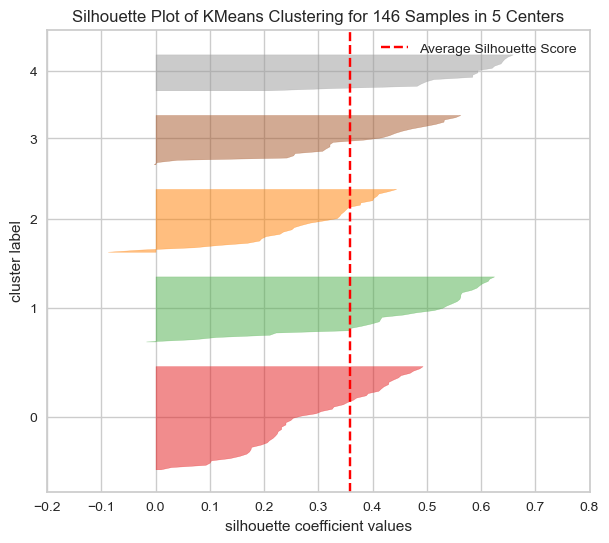

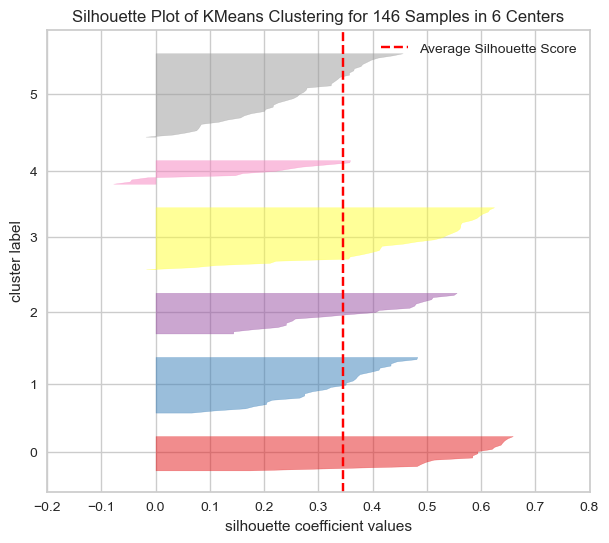

In [103]:
for i in range(2,7):
    kmns = KMeans(n_clusters=i,random_state=10,n_init=10)
    visualizer = SilhouetteVisualizer(kmns,color='yellowbrick')
    
    visualizer.fit(df_scaled)
    visualizer.show()

In [104]:
# Hierarchial Clustering

In [105]:
# Build the Model

In [106]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

In [107]:
df_dummy = pd.read_csv('dummy.csv')
df_dummy.head()

,x1,x2
0,2,1
1,3,2
2,3,3
3,10,12
4,13,12


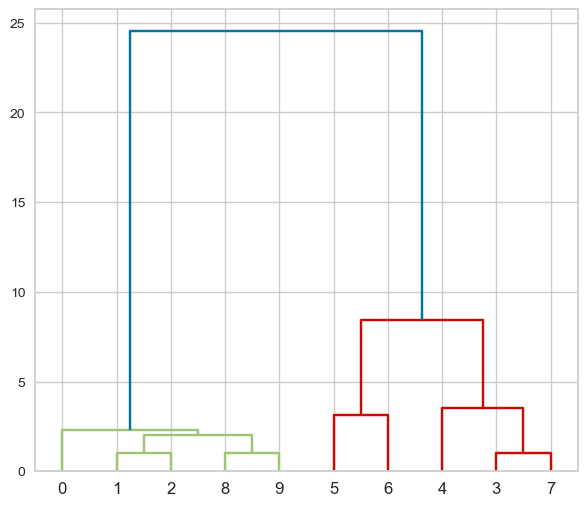

In [108]:
z_link = linkage(df_dummy,'ward')
dendrogram(z_link)
plt.show()

In [109]:
z_link

array([[ 1.        ,  2.        ,  1.        ,  2.        ],
       [ 8.        ,  9.        ,  1.        ,  2.        ],
       [ 3.        ,  7.        ,  1.        ,  2.        ],
       [10.        , 11.        ,  2.        ,  4.        ],
       [ 0.        , 13.        ,  2.28035085,  5.        ],
       [ 5.        ,  6.        ,  3.16227766,  2.        ],
       [ 4.        , 12.        ,  3.51188458,  3.        ],
       [15.        , 16.        ,  8.43010478,  5.        ],
       [14.        , 17.        , 24.51530134, 10.        ]])

In [110]:
# Dendrogram is the visualization of how the cluster is formed

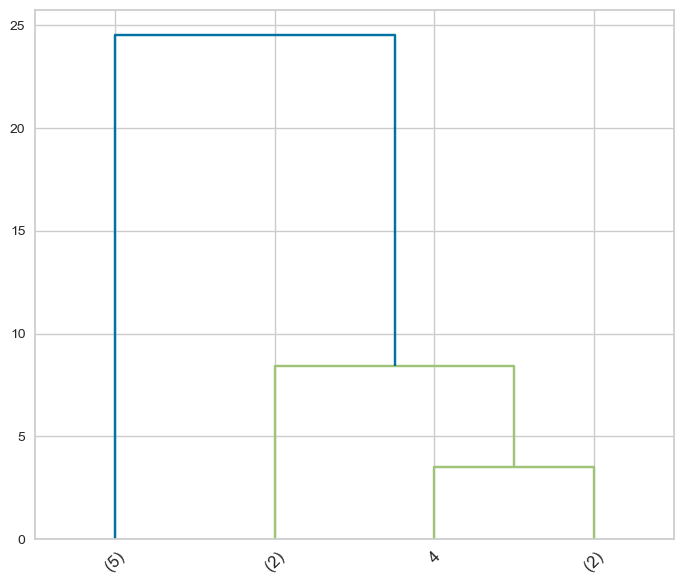

In [111]:
# with Truncate model = lastp

z_link = linkage(df_dummy,'ward')
dendrogram(z_link,
          leaf_rotation=45,
          p=4,
          leaf_font_size=12,
          truncate_mode='lastp')
plt.tight_layout()
plt.show()

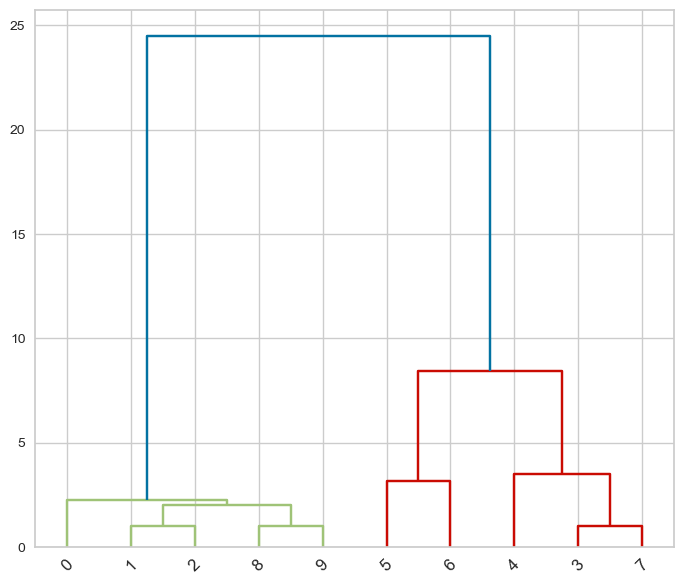

In [112]:
# with Truncate model = level

z_link = linkage(df_dummy,'ward')
dendrogram(z_link,
          leaf_rotation=45,
          p=4,
          leaf_font_size=12,
          truncate_mode='level')
plt.tight_layout()
plt.show()

In [113]:
# calculate the euclidean distance between the observations

eucli_dist_dummy = euclidean_distances(df_dummy)
dist_array = eucli_dist_dummy[np.triu_indices(10,k=1)]
coeff,cophenet_dist = cophenet(z_link,dist_array)

print(coeff)
print("euclidean dstance",eucli_dist_dummy)
print('cophetic distance',cophenet_dist)

0.8851452500121572
euclidean dstance [[ 0.          1.41421356  2.23606798 13.60147051 15.55634919 10.
   8.60232527 14.4222051   2.23606798  2.        ]
 [ 1.41421356  0.          1.         12.20655562 14.14213562  8.60232527
   7.21110255 13.03840481  1.          1.41421356]
 [ 2.23606798  1.          0.         11.40175425 13.45362405  7.81024968
   6.70820393 12.20655562  1.41421356  2.23606798]
 [13.60147051 12.20655562 11.40175425  0.          3.          3.60555128
   6.08276253  1.         11.66190379 12.52996409]
 [15.55634919 14.14213562 13.45362405  3.          0.          5.83095189
   7.21110255  3.16227766 13.45362405 14.2126704 ]
 [10.          8.60232527  7.81024968  3.60555128  5.83095189  0.
   3.16227766  4.47213595  8.06225775  8.94427191]
 [ 8.60232527  7.21110255  6.70820393  6.08276253  7.21110255  3.16227766
   0.          7.07106781  6.40312424  7.07106781]
 [14.4222051  13.03840481 12.20655562  1.          3.16227766  4.47213595
   7.07106781  0.         12.5

In [114]:
Z  =linkage(df_scaled,'ward')

In [115]:
# print first 10 ibservations of the linkages matrix 'link_mat'
print(Z[0:10])

[[9.70000000e+01 1.38000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.60000000e+01 1.20303392e-01 2.00000000e+00]
 [1.00000000e+01 4.50000000e+01 1.20303392e-01 2.00000000e+00]
 [9.00000000e+00 3.10000000e+01 1.32137357e-01 2.00000000e+00]
 [1.24000000e+02 1.28000000e+02 1.32137357e-01 2.00000000e+00]
 [0.00000000e+00 1.60000000e+01 1.32137357e-01 2.00000000e+00]
 [1.23000000e+02 1.34000000e+02 1.33156753e-01 2.00000000e+00]
 [2.00000000e+00 4.40000000e+01 1.33156753e-01 2.00000000e+00]
 [7.60000000e+01 7.70000000e+01 1.43937820e-01 2.00000000e+00]
 [1.80000000e+01 4.30000000e+01 1.43937820e-01 2.00000000e+00]]


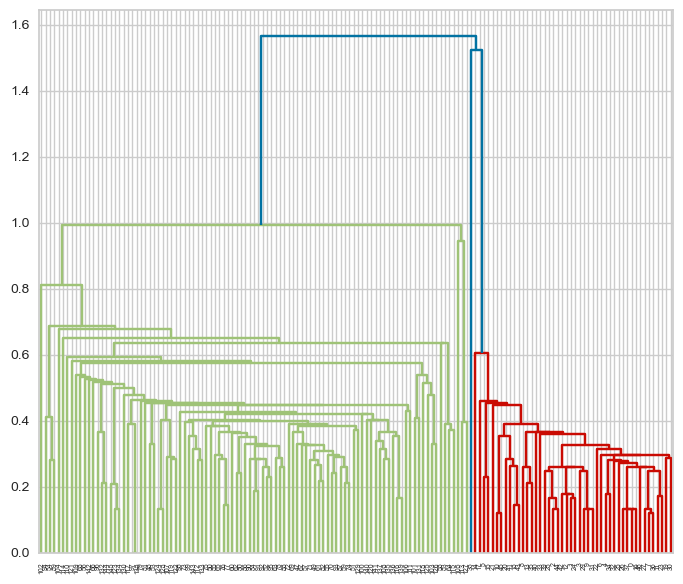

In [116]:
# with Single

Z = linkage(df_scaled,'single')
dendrogram(Z)
plt.tight_layout()

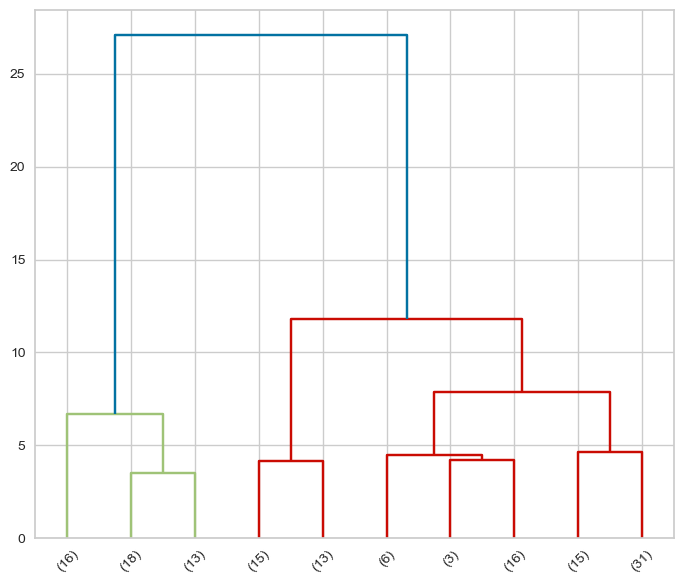

In [117]:
Z = linkage(df_scaled,'ward')
dendrogram(Z,
          leaf_rotation = 45.0,
          p=10,
          leaf_font_size=10,
          truncate_mode='lastp')
plt.tight_layout()
plt.show()

In [118]:
# Cluster Formation

In [119]:
clusters = AgglomerativeClustering(n_clusters=2,linkage='ward')
clusters.fit(df_scaled)

AgglomerativeClustering()

In [120]:
df['cluster'] = clusters.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [121]:
# Visualization

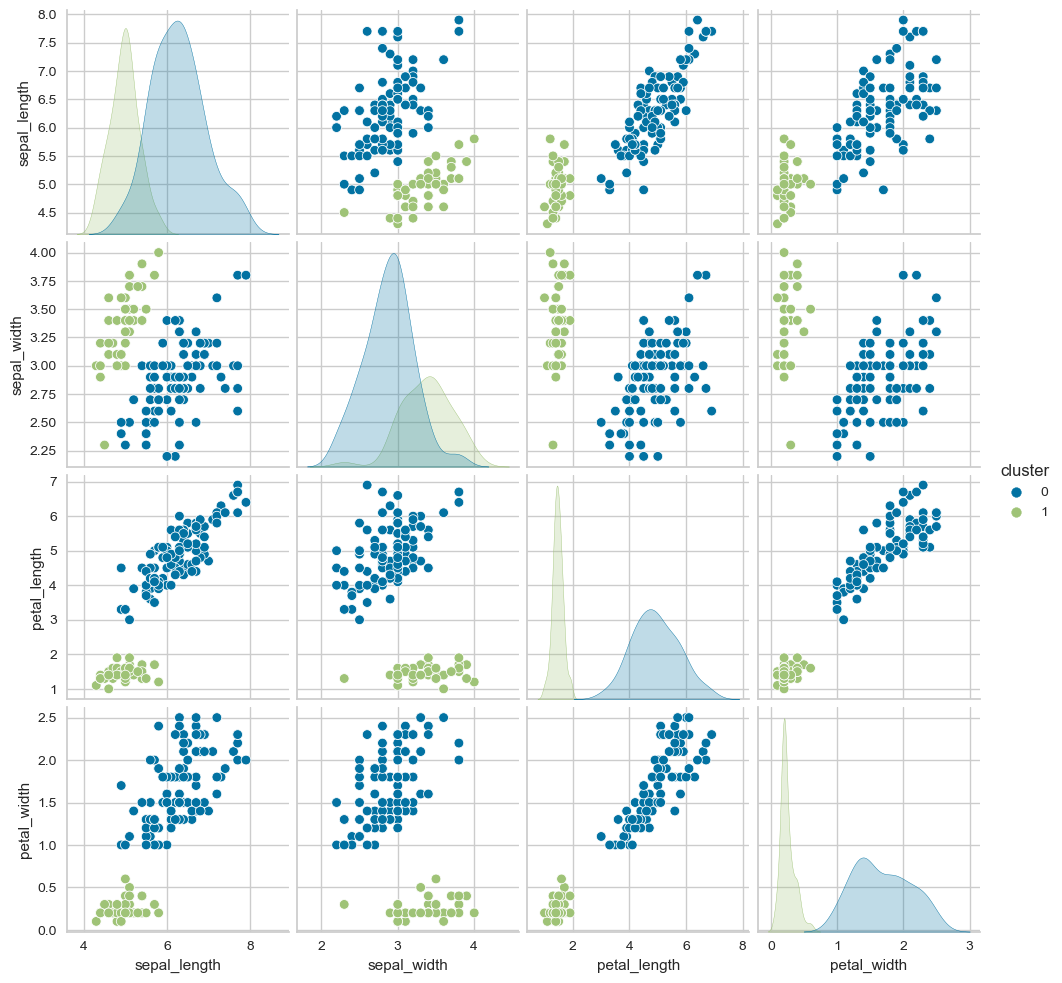

In [122]:
sns.pairplot(df,diag_kind = 'kde',hue='cluster')

In [123]:
# Determine The number of clusters

df_scaled.shape

(146, 4)

In [124]:
# copehetic corelation coeff
eucli_dist = euclidean_distances(df_scaled)
dist_array = eucli_dist[np.triu_indices(146,k=1)]
coeff,cophenet_dist = cophenet(Z,dist_array)

print(coeff)
print("euclidean dstance",eucli_dist)
print('cophetic distance',cophenet_dist)

0.8336661596214184
euclidean dstance [[0.         1.28382102 0.89851769 ... 3.84557019 3.83761926 3.38324567]
 [1.28382102 0.         0.56178128 ... 3.75053059 4.04675227 3.22134617]
 [0.89851769 0.56178128 0.         ... 3.94410165 4.0849998  3.39303166]
 ...
 [3.84557019 3.75053059 3.94410165 ... 0.         1.1481398  0.77079411]
 [3.83761926 4.04675227 4.0849998  ... 1.1481398  0.         1.27038521]
 [3.38324567 3.22134617 3.39303166 ... 0.77079411 1.27038521 0.        ]]
cophetic distance [6.71437372 6.71437372 6.71437372 ... 7.88081754 1.21469267 7.88081754]


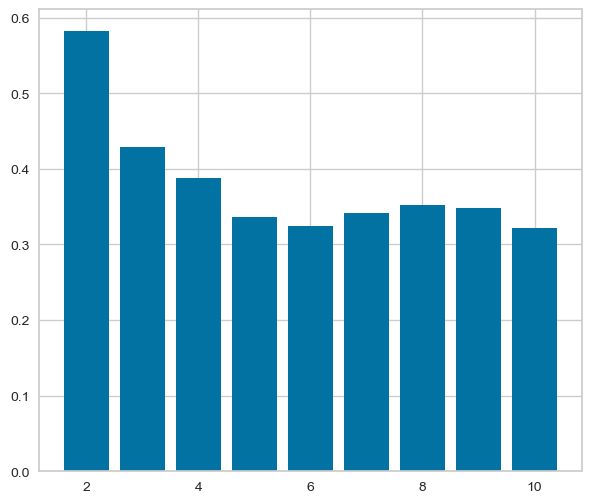

In [125]:
# Silhoutte Method

K = [2,3,4,5,6,7,8,9,10]

sil_score=[]

for i in K:
    model = AgglomerativeClustering(n_clusters = i)
    
    model.fit(df_scaled)
    label = model.labels_    
    sil_score.append(silhouette_score(df_scaled,label))
    
plt.bar(K,sil_score)
plt.show()

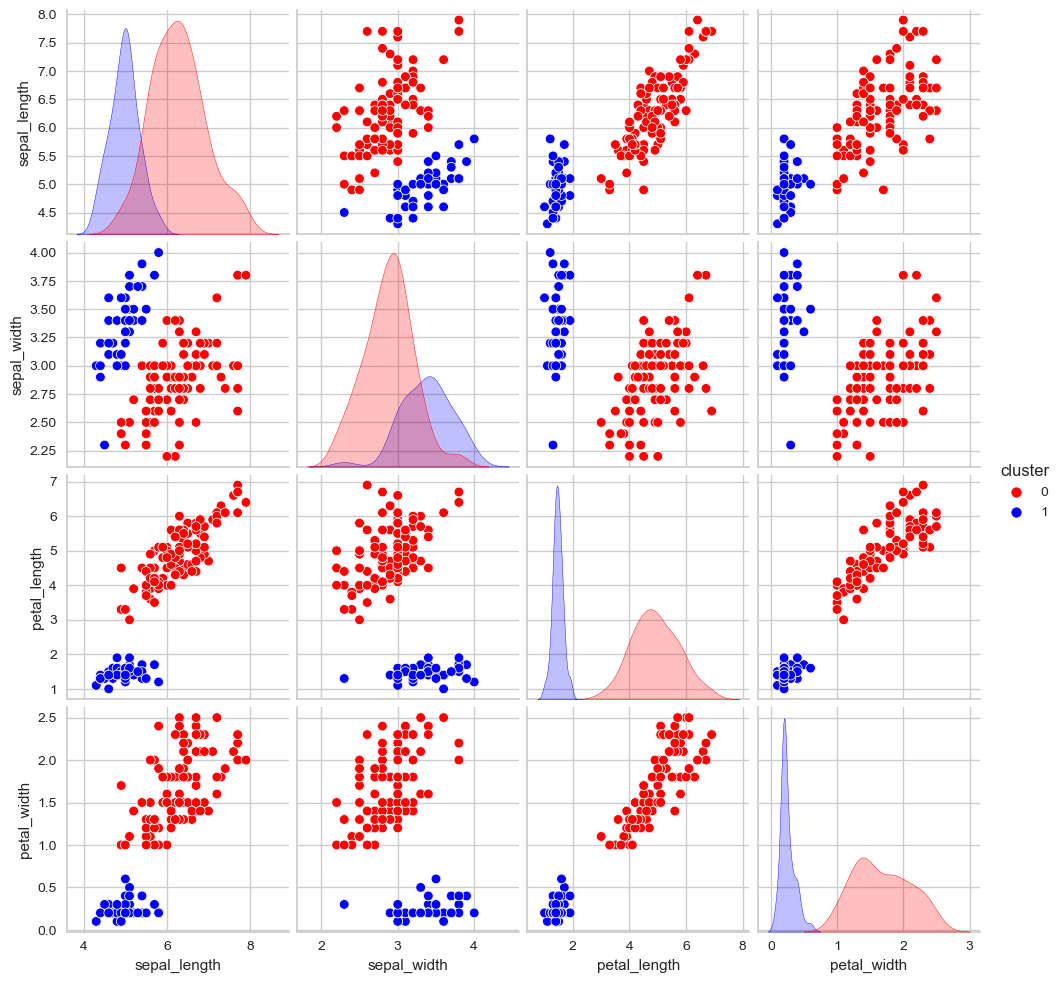

In [126]:
# Statistical Analysis of the Clusters

sns.pairplot(df,diag_kind='kde',hue='cluster',palette=['red','blue'])

In [127]:
# First Cluster

df[df.cluster==0].describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,99.000000,99.000000,99.000000,99.000000,99.0
mean,6.274747,2.880808,4.920202,1.682828,0.0
std,0.653771,0.322515,0.817410,0.421378,0.0
min,4.900000,2.200000,3.000000,1.000000,0.0
25%,5.800000,2.700000,4.400000,1.300000,0.0
50%,6.300000,2.900000,4.900000,1.600000,0.0
75%,6.700000,3.050000,5.550000,2.000000,0.0
max,7.900000,3.800000,6.900000,2.500000,0.0


In [128]:
#  Second Cluster

df[df.cluster==1].describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,4.976596,3.376596,1.461702,0.246809,1.0
std,0.338932,0.327183,0.178829,0.103946,0.0
min,4.300000,2.300000,1.000000,0.100000,1.0
25%,4.800000,3.150000,1.400000,0.200000,1.0
50%,5.000000,3.400000,1.500000,0.200000,1.0
75%,5.100000,3.600000,1.600000,0.300000,1.0
max,5.800000,4.000000,1.900000,0.600000,1.0


In [129]:
# DBScan Method

from sklearn.cluster import DBSCAN

In [130]:
# Finding the distance between the min and max point

#df = pd.read_csv('db_data.csv')
#df.head()

In [131]:
#db = DBSCAN(eps=0.2,min_samples=5)
#db.fit(df.iloc[:,0:2])
#dblabel1=db.labels_
#plt.scatter(df['F1'],df['F2'],c = dblabel1)
#plt.show()

In [132]:
#np.unique(dblabel1)

In [133]:
# finding the distance between the min and max point

In [134]:
distance = euclidean_distances(df_scaled)[np.triu_indices(146,k=1)]
print(distance.min())
print(distance.max())

0.0
6.703428114343974


In [135]:
# Epsilon and min_samples

db = DBSCAN(eps=0.9,min_samples=3)
db.fit(df_scaled)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [136]:
df.shape

(146, 5)

In [137]:
df['db_cluster']=db.labels_

In [138]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,db_cluster
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
